![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [41]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

###  data preprocessing 

In [42]:
#load CSV file
netflix_df = pd.read_csv("netflix_data.csv")
print(netflix_df.head())

#Filter the data to take movie type only
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
print(netflix_subset[:10])

# Make new DataFrame have "title", "country", "genre", "release_year", "duration" columns only
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
print(netflix_movies[:10])

#Filter 60 minutes or less movies 
short_movies = netflix_movies[netflix_movies['duration'] < 60]

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]
     show_id  ...          genre
1         s2  ...         Dramas
2         s3  ...  Horror Movies
3         s4  ...         Action
4         s5  ...         Dramas
6         s7  ...  Horror Movies
...      ...  ...            ...
7781   s7782  ...       Children
7782   s7783  ...         Dramas
7783   s7784  ...         Dramas
7784   s7785  ...  Documentaries
7786   s7787  ...  Documentaries

[5377 rows x 11 columns]
                                        title  ... duration
1                                        7:19  ...       93
2                                       23:59  ...       78
3                                           9  ...       80
4                                          21  ...      123
6                                         122  ...       

### preapare for ploting 

In [43]:
#create a empty list of color 
colors =[]

for label,row in netflix_movies.iterrows() :
    if row["genre"] == "Children" :
        colors.append("red")
    elif row["genre"] == "Documentaries" :
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
#Display colors list         
print(colors[:20])        

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


### visualization part 

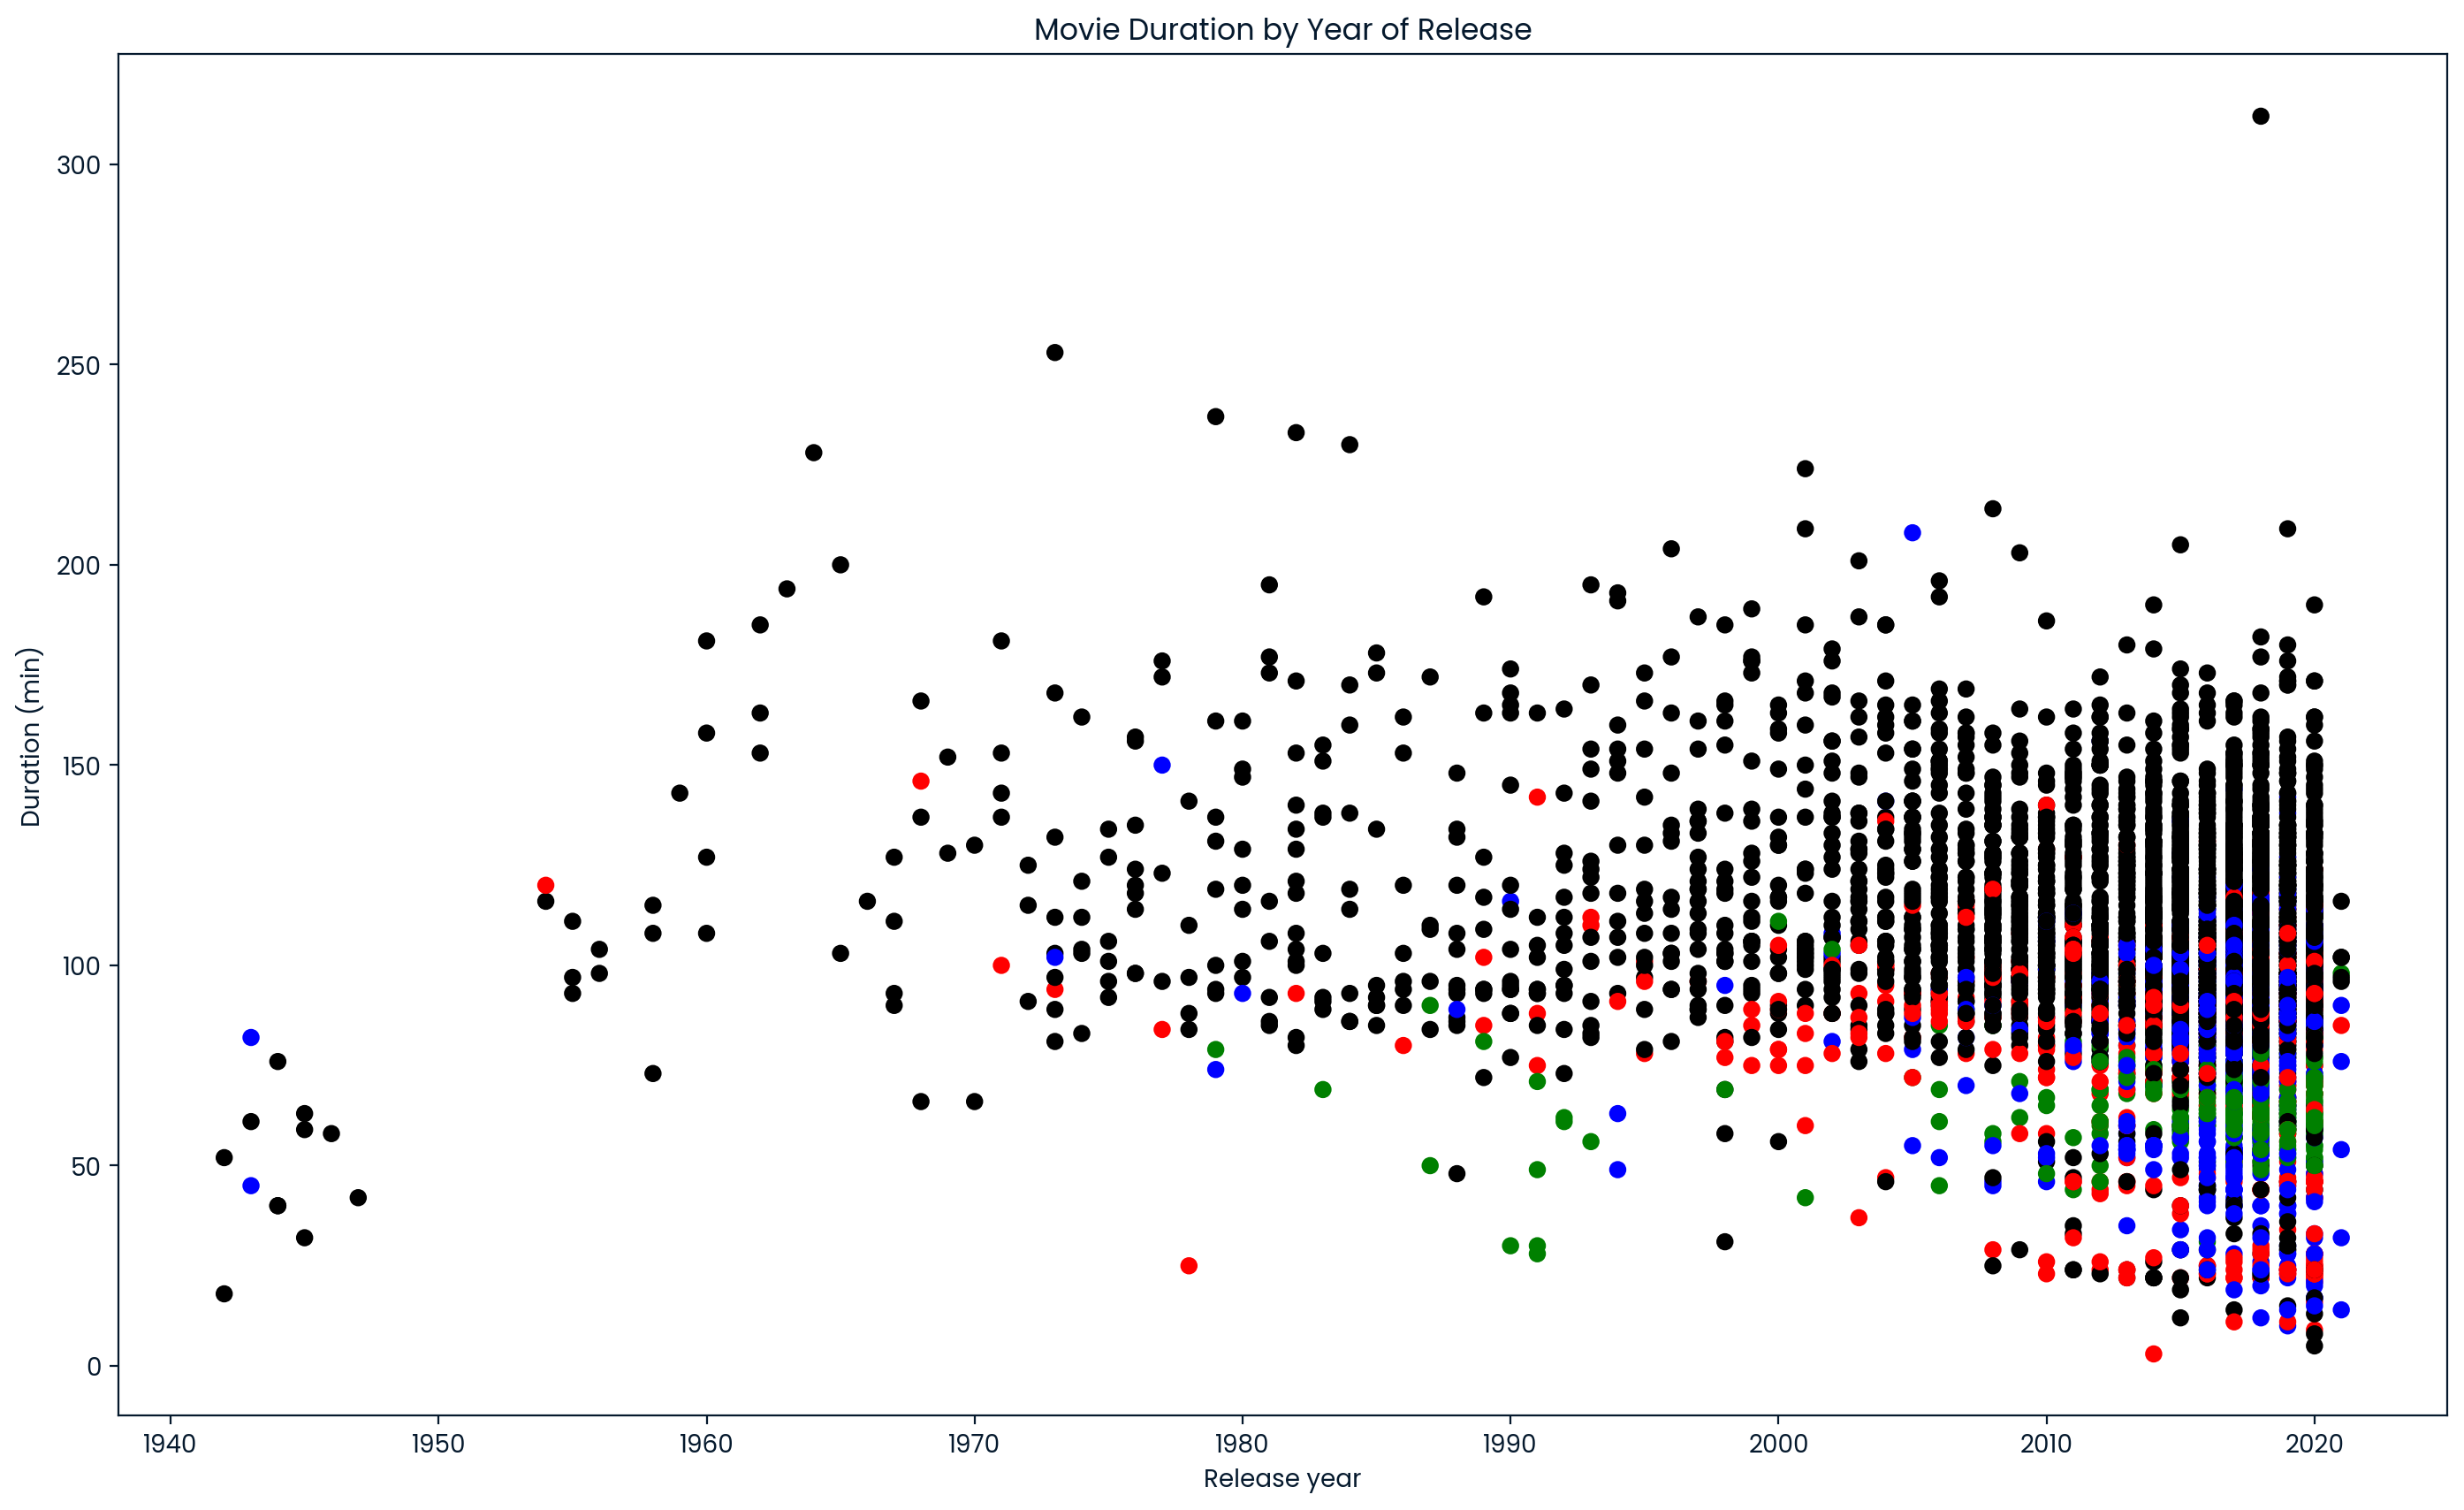

In [44]:
fig = plt.figure(figsize=(17,10))

plt.scatter(netflix_movies["release_year"],netflix_movies["duration"],c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()


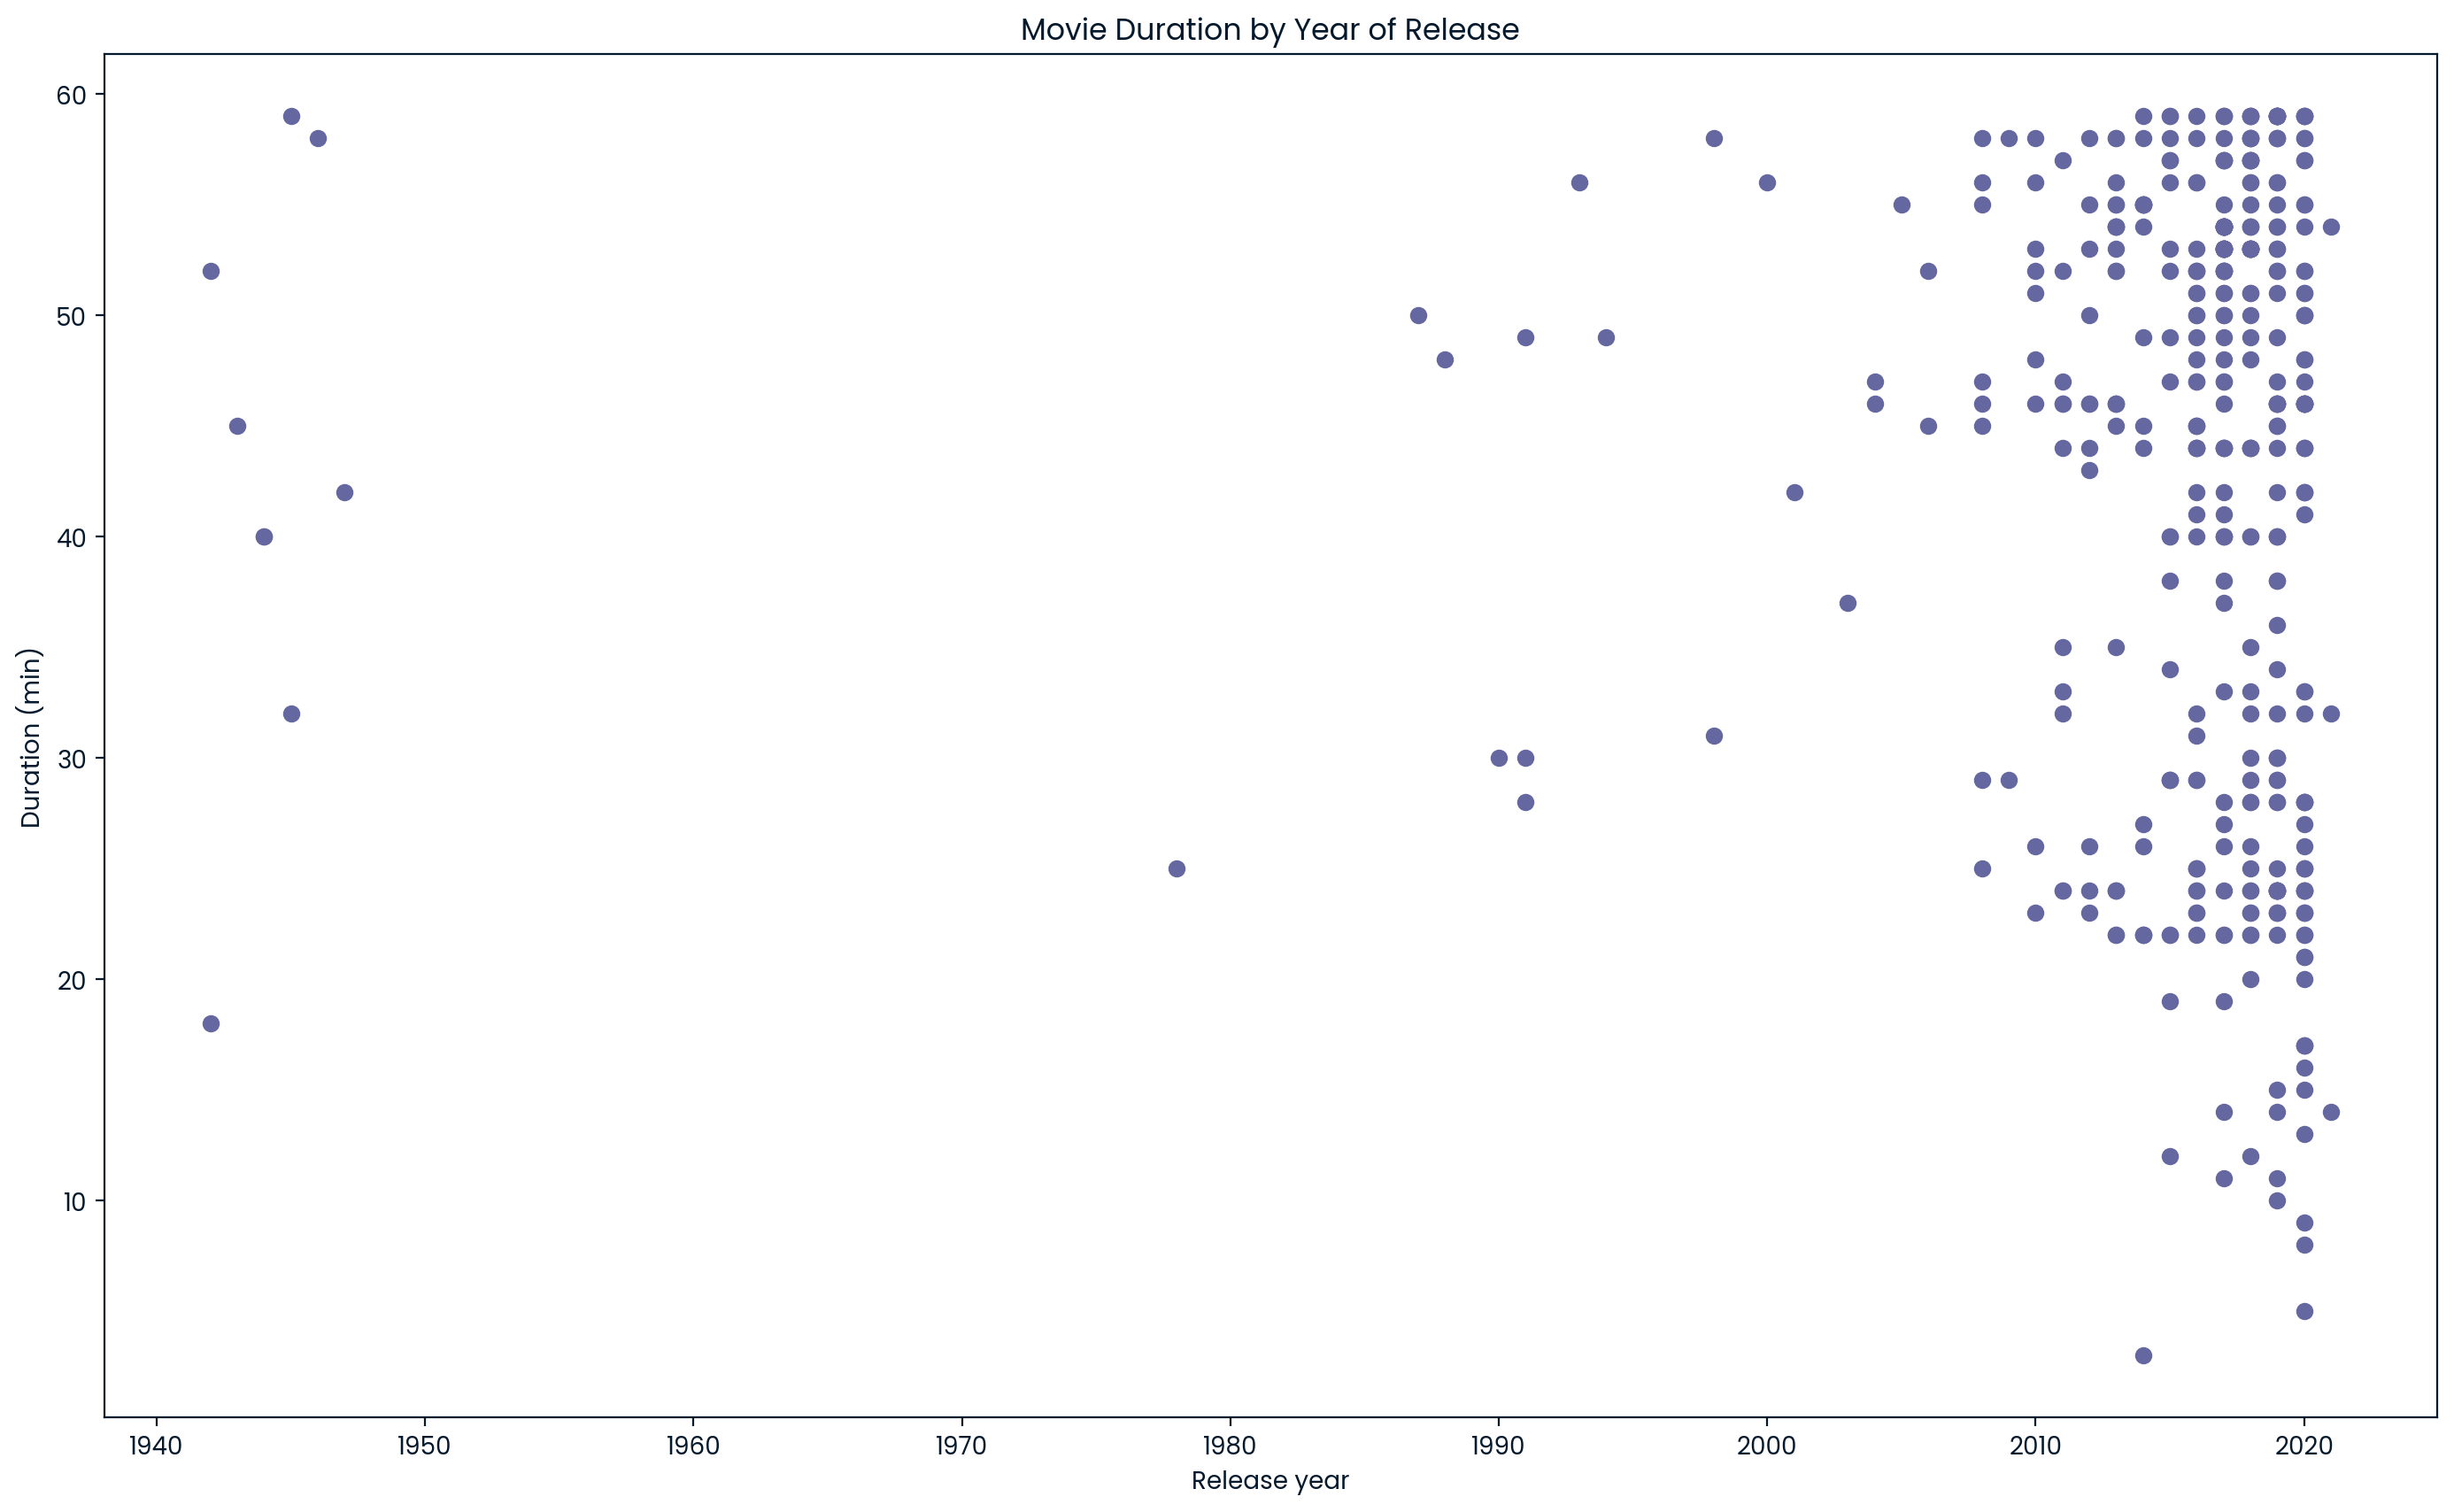

In [45]:
fig = plt.figure(figsize=(17,10))

plt.scatter(short_movies["release_year"], short_movies["duration"])

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [46]:
# Are we certain that movies are getting shorter?
answer = "no"